#1. 간단한 선형회귀 모델 만들기
- 데이터 준비하기-데이터 시각화-모델만들기-모델 컴파일-학습-결과 시각화-예측하기-가중치 출력-예측값 시각화

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
X = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
y = [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]

X_train = np.array(X).reshape(-1, 1)
y_train = np.array(y)

print(X_train.shape, y_train.shape)

(10, 1) (10,)


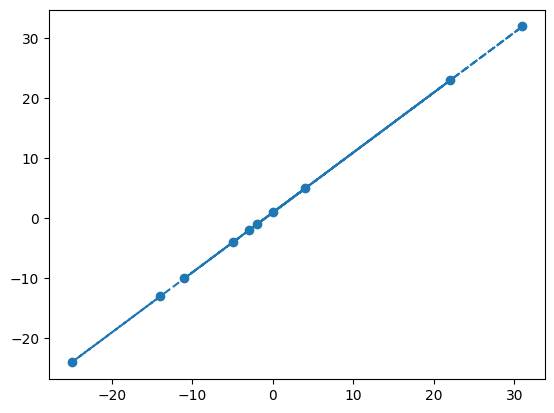

In [ ]:
# 학습 데이터와 y 값을 산포도로 그린다.
plt.plot(X, y, 'o--')
plt.show()

## 데이터 전처리
-넘파이 리스트를 데이터 프레임으로

In [ ]:
import pandas as pd

df = pd.DataFrame({'x':X, 'y':y})
df.head()

,x,y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1


In [ ]:
df.shape

(10, 2)

In [ ]:
X_train = df.loc[:, ['x']]
y_train = df.loc[:, ['y']]
print(X_train.shape, y_train.shape)

(10, 1) (10, 1)


## 모델 학습

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
lr.coef_, lr.intercept_

(array([[1.]]), array([1.]))

In [ ]:
print("기울기:", lr.coef_[0][0])
print("y절편:", lr.intercept_[0])

기울기: 0.9999999999999999
y절편: 0.9999999999999999


## 예측

In [ ]:
X_new = np.array(11).reshape(1,1)
X_new

array([[13]])

In [ ]:
lr.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.]])

In [ ]:
X_test = np.arange(11, 16, 1).reshape(-1, 1)
X_test

array([[11],
       [12],
       [13],
       [14],
       [15]])

In [ ]:
y_pred = lr.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])

## 1-1 회귀의 선형 모델
### 회귀의 경우 선형 모델을 위한 일반화된 예측 함수는 다음과 같습니다.

ŷ = w[0] × x[0] + w[1] × x[1] + … + w[p] × x[p] + b

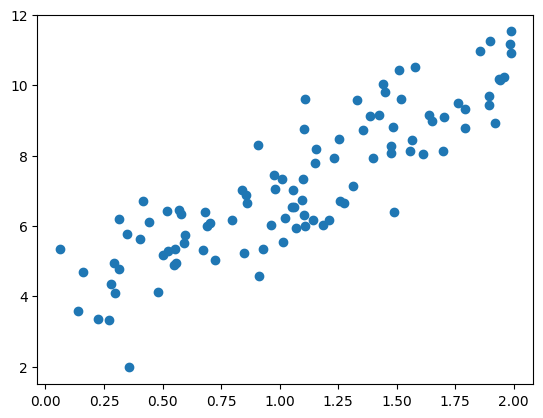

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = 2 * np.random.rand(100,1) # [0, 1) 범위에서 균일한 분포 100 X 1 array
y = 4 + 3*x + np.random.randn(100,1) # normal distribution(mu=0,var=1)분포 100 X 1 array

plt.scatter(x,y)
plt.show()

In [ ]:
x_b = np.c_[np.ones((100,1)),x] # 모든 샘플에 index 0번에 1을 추가

# np.linalg.inv는 넘파이 선형대수 모듈(linalg)의 inv(역함수)
# .dot은 행렬 곱셈
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.89121327],
       [3.01276651]])

In [ ]:
# theta_best를 사용해서 y 값 예측
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]

prediction = x_new_b.dot(theta_best)
prediction


array([[3.89121327],
       [9.9167463 ]])

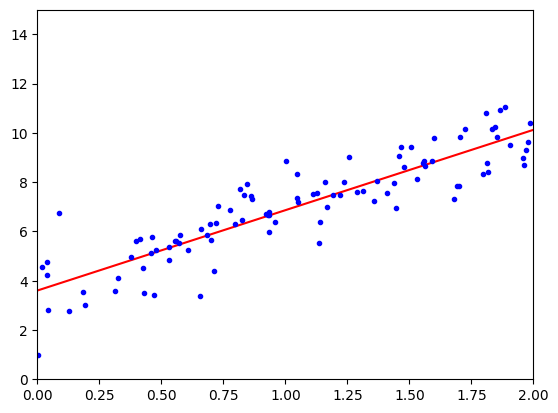

In [ ]:
plt.plot(x_new,prediction,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15]) # x축 범위 0~2, y축 범위 0~15
plt.show()

#  sklearn(사이킷런) 라이브러리를 사용

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)

print(lin_reg.intercept_,lin_reg.coef_)

[3.89121327] [[3.01276651]]


In [ ]:
print(lin_reg.predict(x_new))

[[3.89121327]
 [9.9167463 ]]


In [ ]:
# 경사 하강법 구현(implementation)
import numpy as np

x = 2 * np.random.rand(100,1) # 100 x 1 크기의 0~1의 균일분포
x_b = np.c_[np.ones((100,1)),x] # bias(1)를 전체 데이터에 추가
y = 4 + 3*np.random.randn(100,1) # 100 x 1 크기의 표준정규분포 추출

learning_rate = 0.001
iterations = 1000
m = x_b.shape[0] # 100개 (x 데이터)

theta = np.random.randn(2,1) # 2x1 크기의 평균 0, 분산1 정규 분포 추출

for iteration in range(iterations):
  gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
  theta = theta - (learning_rate * gradients)

In [ ]:
theta #편향값

array([[3.35988648],
       [0.5131948 ]])

**굵은 텍스트**# 2. 다항 회귀
### y_hat = 0.25x^2 - 0.05x^1 + 1

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

data_num = 1000

x = 3 * np.random.rand(data_num,1) - 1
y = 0.2 * (x**2) + np.random.randn(1000,1)


poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])

[-0.10632931]
[-0.10632931  0.01130592]


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_poly,y)

print(lin_reg.intercept_,lin_reg.coef_)

[-0.02153404] [[-0.19011951  0.3258125 ]]


#[실습] Auto-mpg.csv 회귀분석
mpg : 연비(miles per gallon)
cylinders : 실린더수
displacement : 배기량
horsepower: 출력
weight : 차 무게
acceleration : 가속능력
model year : 출시년도
origin : 제조국 1(USA), 2(EU), 3(JPN)
name : 모델명

-독립변수(x) : name(자동차 종류별)을 제외한 나머지
-종속변수(y) : mpg

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

mpg = pd.read_csv('/content/drive/MyDrive/Fly-AI/Datasets/auto-mpg.csv', na_values="?")

mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [6]:
mpg.isna().sum(axis=0)

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [7]:
df=mpg[mpg['horsepower'].isna()]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [8]:
mpg=mpg.dropna()
mpg.isna().sum(axis=0)

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [9]:
X_data = mpg.drop(['mpg','car name'], axis=1) #mpg는 연비

In [10]:
X_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


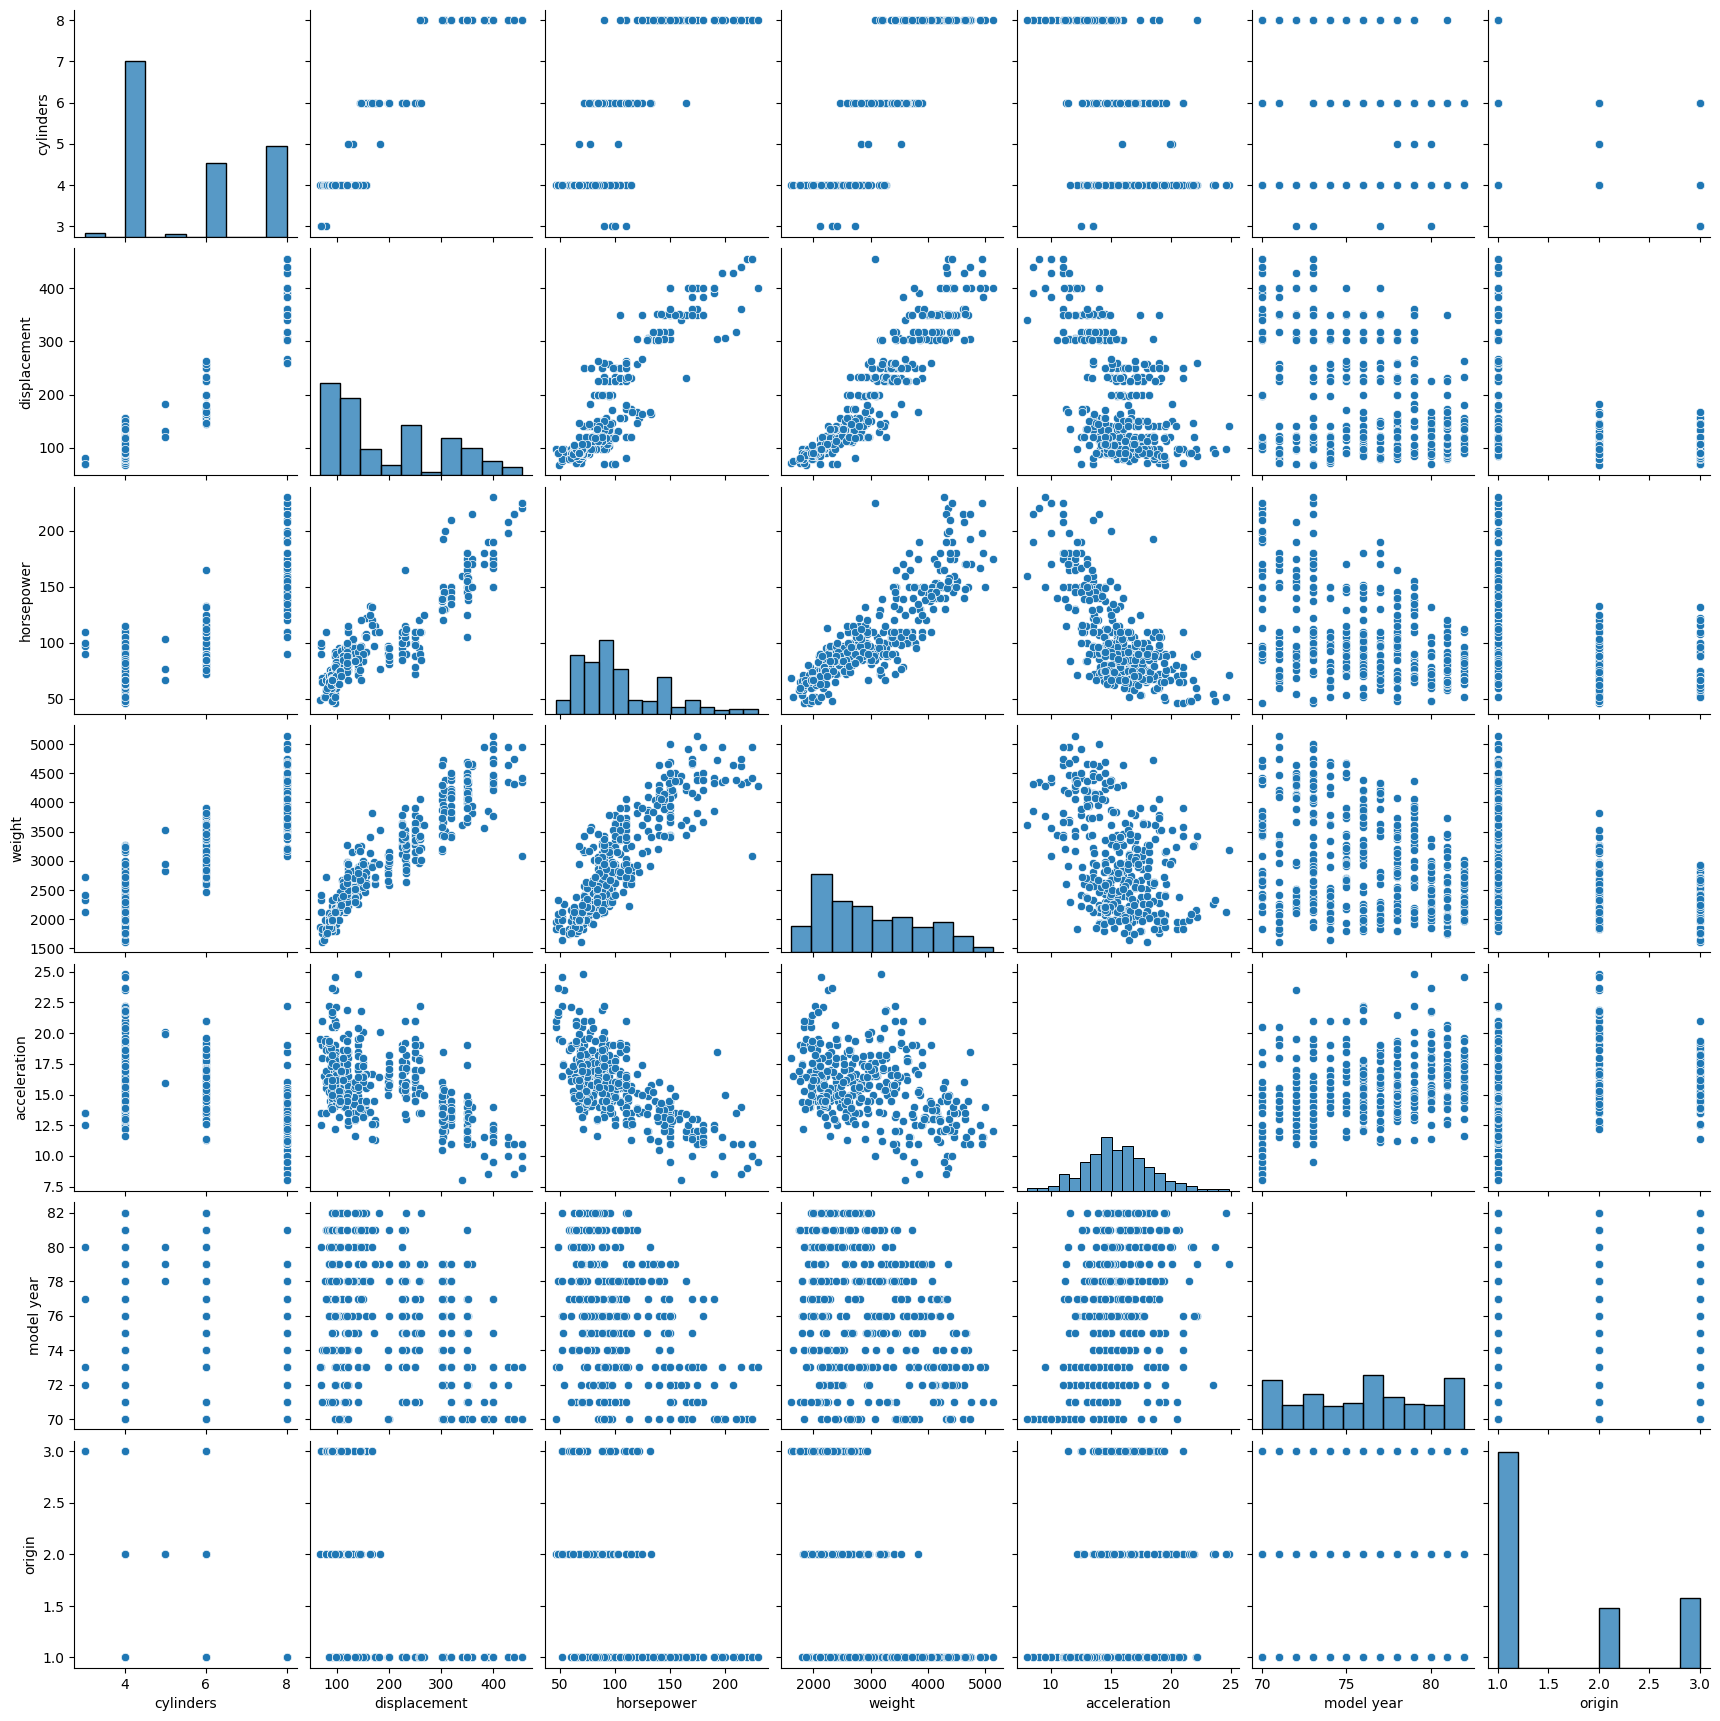

In [21]:
import seaborn as sns
sns.pairplot(X_data)

In [11]:
y_data= mpg['mpg']

In [12]:
y_data.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_data,
                                                  y_data,
                                                  test_size=0.3, #0.1, 0.2. 0.3
                                                  random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(274, 7) (118, 7)
(274,) (118,)


In [14]:
print( len(X_train))
print(len(X_test))

274
118


In [15]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [16]:
print(lr.score(X_train, y_train))
print(lr.intercept_)

0.8221075220232333
-16.368259804717354


In [17]:
lr.coef_

array([-0.35963797,  0.01579344, -0.02806989, -0.00600577,  0.04119833,
        0.742086  ,  1.67379885])

In [18]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_s= scaler.fit_transform(X_train)
X_test_s= scaler.transform(X_test)

In [ ]:
print(X_train_s[:5]) #0.2

[[ 0.30486156  0.28457757  0.14142863  0.75480297  1.1217589   0.49452752
  -0.68982474]
 [-0.87318372 -0.53588042 -0.32949862 -0.49312922 -0.22893966 -0.0572982
  -0.68982474]
 [ 0.30486156 -0.23665456 -0.19868549 -0.00252992 -0.37111846 -0.33321105
  -0.68982474]
 [ 1.48290683  1.18225513  1.18793363  1.3680521  -0.72656545 -1.16094962
  -0.68982474]
 [-0.87318372 -1.05711255 -1.06205212 -1.32309939  0.30423083  1.32226608
  -0.68982474]]


In [19]:
print(X_train_s[:5])  #0.3

[[-0.87326597 -0.85486343 -0.28591285 -0.72540295  0.34274942 -0.86872055
   1.76704713]
 [ 0.29392855  0.03135952 -0.52235185 -0.47702856  0.16747256 -1.69905578
  -0.69067324]
 [-0.87326597 -0.74890199 -0.33845485 -0.65972703 -0.18308116  1.06872831
   1.76704713]
 [ 0.29392855  0.02172667 -0.39099685 -0.404188   -0.18308116 -1.69905578
  -0.69067324]
 [ 0.29392855  0.51300243 -0.12828685  0.41735805  0.51802628 -0.59194214
  -0.69067324]]


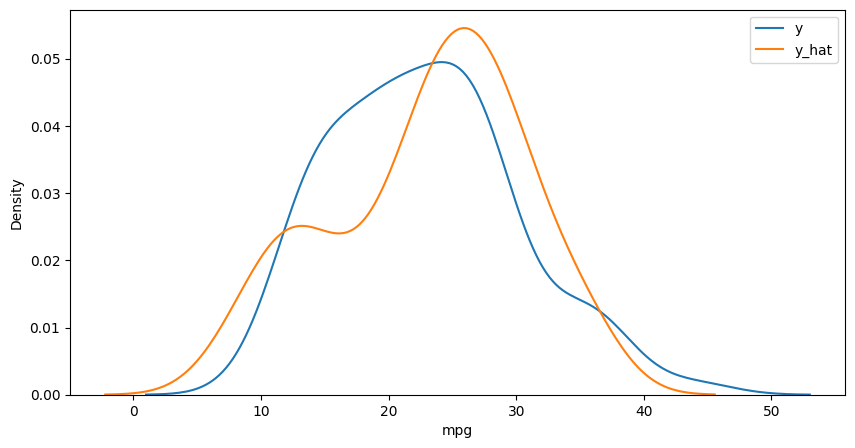

In [ ]:
#0.2
import matplotlib.pyplot as plt
import seaborn as sns

y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))

ax1 = sns.kdeplot(y_test, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)

plt.legend()

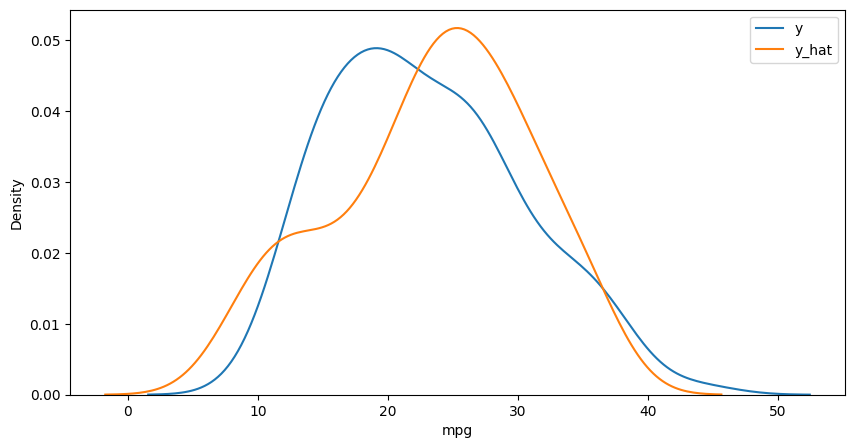

In [20]:
#0.3
import matplotlib.pyplot as plt
import seaborn as sns

y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))

ax1 = sns.kdeplot(y_test, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)

plt.legend()

#[실습] Toluca Company dataset
 ### Lot_size: 제품크기, Work_hours : 작업 시간

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

df = pd.read_csv('toluca_company_dataset.csv') ## 데이터 불러오기

In [ ]:
df.head(5)

,Lot_size,Work_hours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


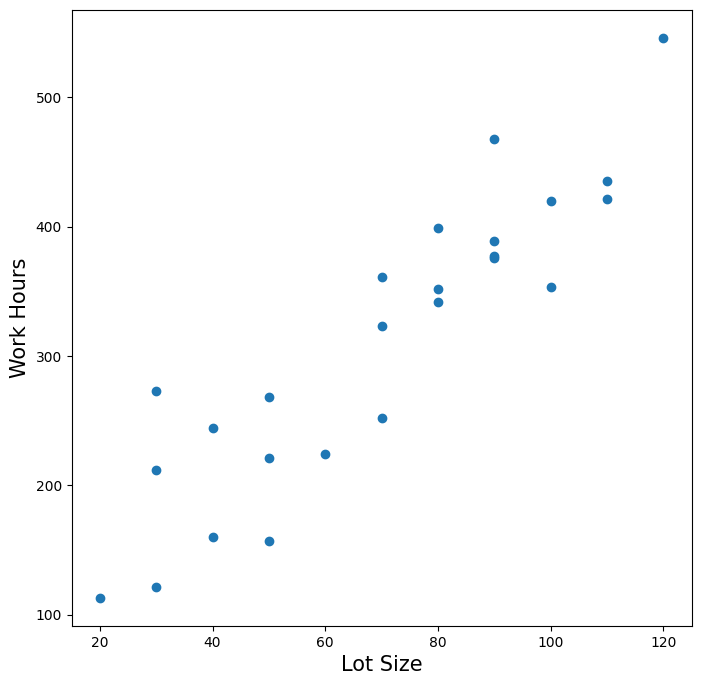

In [ ]:
## 시각화(분포보기)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

font_size = 15
plt.scatter(df['Lot_size'],df['Work_hours']) ## 원 데이터 산포도

plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work Hours',fontsize=font_size)
plt.show()

In [ ]:
## states model 사용
fit = ols('Work_hours ~ Lot_size',data=df).fit() ## 단순선형회귀모형 적합

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Work_hours   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           4.45e-10
Time:                        16:51:13   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3659     26.177      2.382      0.026       8.214     116.518
Lot_size       3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 정확한 모델을 학습하고 결과를 해석할 수 있다
- 선형성, 독립성, 정규성, 등분산성

In [ ]:
# states model 사용(단순선형회귀모형 적합)

fit= ols('Work_hours ~ Lot_size -1',data=df).fit()

In [ ]:
## 추정값
fit.fittedvalues

,0
0,346.973999
1,130.115249
2,216.858749
3,390.345748
4,303.602249
5,260.230499
6,520.460998
7,346.973999
8,433.717498
9,216.858749


In [ ]:
# 모델검증에 필요한 잔차

fit.resid

,0
0,52.026001
1,-9.115249
2,4.141251
3,-14.345748
4,57.397751
5,-36.230499
6,25.539002
7,5.026001
8,-80.717498
9,-59.858749


In [ ]:
#예측값
fit.predict(exog = dict(Lot_size =[80]))

,0
0,346.973999


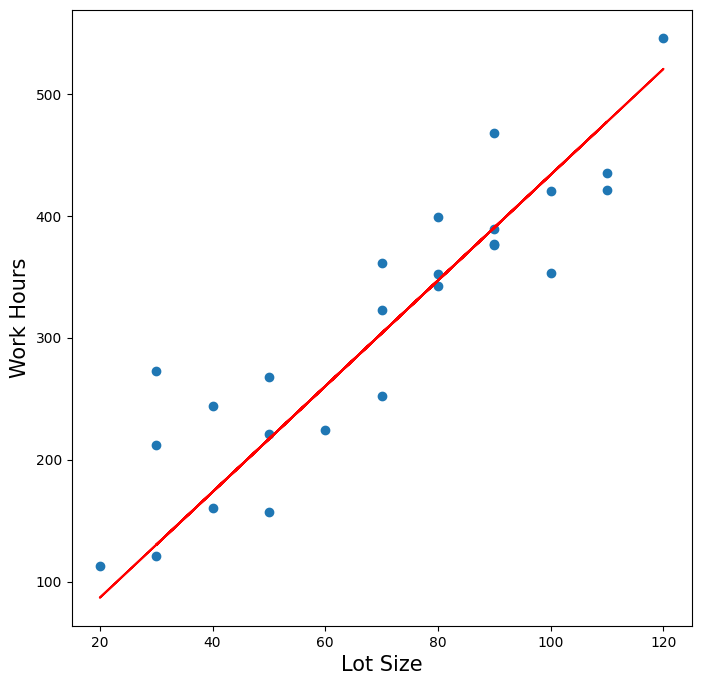

In [ ]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

font_size = 15
plt.scatter(df['Lot_size'],df['Work_hours']) ## 원 데이터 산포도
plt.plot(df['Lot_size'],fit.fittedvalues,color='red') ## 회귀직선 추가

plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work Hours',fontsize=font_size)
plt.show()

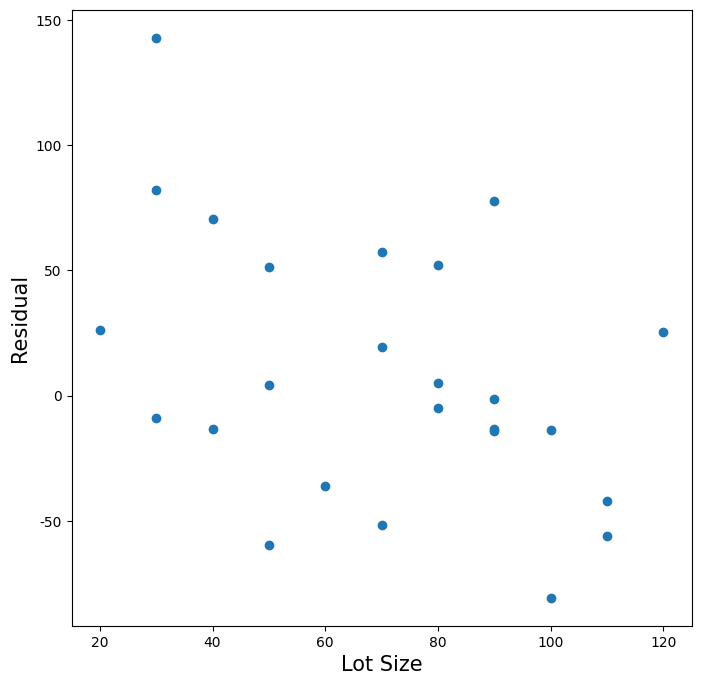

In [ ]:
## 잔차도 Residual Plot
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

font_size = 15

plt.scatter(df['Lot_size'],fit.resid) ## 잔차도 출력

plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Residual', fontsize=font_size)
plt.show()

## ► sklearn을 이용

In [ ]:
## sklearn linear regression 사용
x = df['Lot_size'].values.reshape(-1,1) ## 차원 증가 시켜준다.
y = df['Work_hours']

fit = LinearRegression().fit(x,y) ## 단순선형회귀모형 적합

In [ ]:
# 회귀 계수
print('절편:',fit.intercept_)
print('기울기:', fit.coef_)


절편: 62.36585858585849
기울기: [3.57020202]


In [ ]:
## 추정값
fit.predict(x)

array([347.9820202 , 169.47191919, 240.8759596 , 383.6840404 ,
       312.28      , 276.5779798 , 490.79010101, 347.9820202 ,
       419.38606061, 240.8759596 , 205.17393939, 312.28      ,
       383.6840404 , 133.76989899, 455.08808081, 419.38606061,
       169.47191919, 240.8759596 , 383.6840404 , 455.08808081,
       169.47191919, 383.6840404 , 205.17393939, 347.9820202 ,
       312.28      ])

In [ ]:
## 잔차
residual = y - fit.predict(x)
print(residual)

0      51.017980
1     -48.471919
2     -19.875960
3      -7.684040
4      48.720000
5     -52.577980
6      55.209899
7       4.017980
8     -66.386061
9     -83.875960
10    -45.173939
11    -60.280000
12      5.315960
13    -20.769899
14    -20.088081
15      0.613939
16     42.528081
17     27.124040
18     -6.684040
19    -34.088081
20    103.528081
21     84.315960
22     38.826061
23     -5.982020
24     10.720000
Name: Work_hours, dtype: float64


In [ ]:
# 제품의 크기가 80이라면 얼마나 시간이 걸릴지 예측값
fit.predict([[80]])


array([347.9820202])

#보스톤 주택가격

In [ ]:
import numpy as np

#무작위로 선형 데이터셋 생성
X = 2 * np.random.rand(100,1)  #rand: 난수 생성 함수
y = 4 +  3 * X + np.random.randn(100,1) #randn은 정규분포에 대한 난수 생성

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lin_reg.fit(X_train, y_train)

print(lin_reg.intercept_)  #편향(절편)
print(lin_reg.coef_)       #가중치
print(lin_reg.score(X_train, y_train)) #train set 점수
print(lin_reg.score(X_test, y_test)) #test set 점수

[3.96325161]
[[3.08455172]]
0.786120026480104
0.631484231069268


In [ ]:
import pandas as pd

boston = pd.read_csv('Boston_house.csv')
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [ ]:
boston.shape

(506, 14)

CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

In [ ]:
# 범죄율, 주택당 방 수, 인구 중 하위 계층 비율, 노후 주택 비율과 주택가격과의 상관관계를 예측

from sklearn.model_selection import train_test_split

X = boston[['CRIM','RM', 'LSTAT', 'AGE']]
y = boston[['Target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
import matplotlib.pyplot as plt
%matplotlib inline

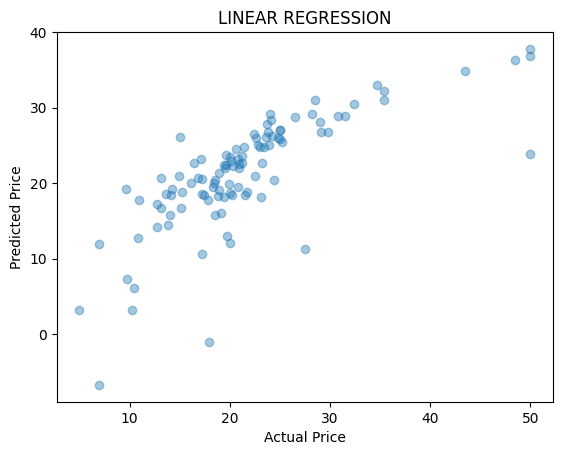

In [ ]:
#실제 주택값과 예측한 주택값 간의 상관관계

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [ ]:
reg.coef_

array([[-0.1298062 ,  5.45294513, -0.60480624,  0.0171971 ]])


coef_값을 구해보면 RM(주택당 방 수)의 가중치가 가장 높다. 이말은 즉 RM이 보스턴 주택가격에 미치는 영향이 가장 높다고 해석

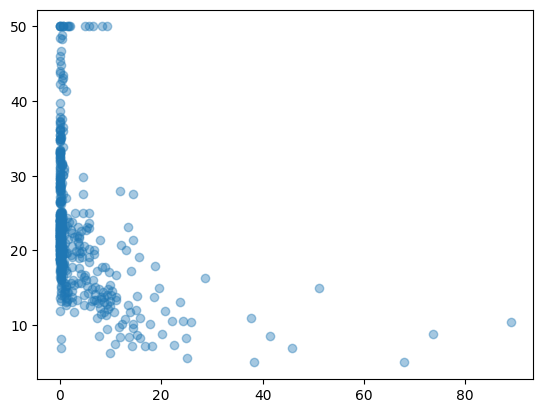

In [ ]:
plt.scatter(boston[['CRIM']], boston[['Target']], alpha=0.4)
plt.show()

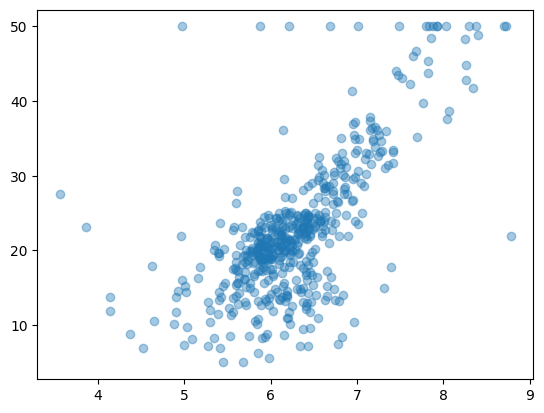

In [ ]:
plt.scatter(boston[['RM']], boston[['Target']], alpha=0.4)
plt.show()

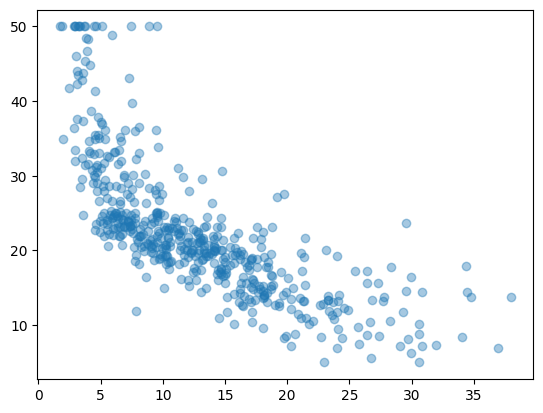

In [ ]:
plt.scatter(boston[['LSTAT']], boston[['Target']], alpha=0.4)
plt.show()

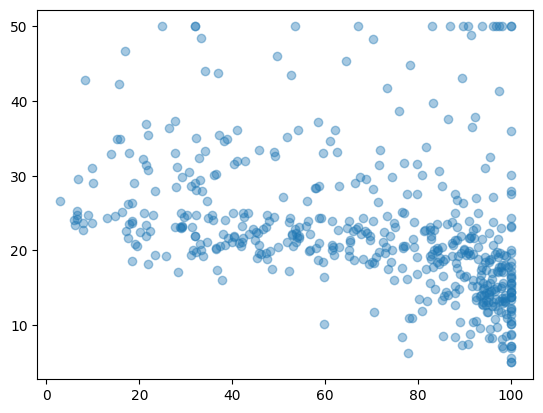

In [ ]:
plt.scatter(boston[['AGE']], boston[['Target']], alpha=0.4)
plt.show()

In [ ]:
# 범죄율과 노후 주택 수는 주택가격과 상관관계가 없어보이고, 방 개수가 가장 큰 양의 상관관계

reg.score(X_train, y_train) #train set R^2 점수
reg.score(X_test, y_test) #test set R^2 점수

0.5564675983574296

### R² 값을 제공하는 score함수로 train set과 test set의 점수를 구해보면 성능이 그리 좋지는 않다. 4개 변수 중 2개 변수만 설명력이 있기 때문에 어찌보면 당연한 결과이기도 하다

In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 12.5 MB/s eta 0:00:00


# ► 이진 분류
### 두 개의 특성을 가진 forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋

In [ ]:
# 라이브러라

import mglearn
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()

In [ ]:
#데이터 확인

print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (26, 2)
y.shape: (26,)


In [ ]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

X.shape: (26, 2)


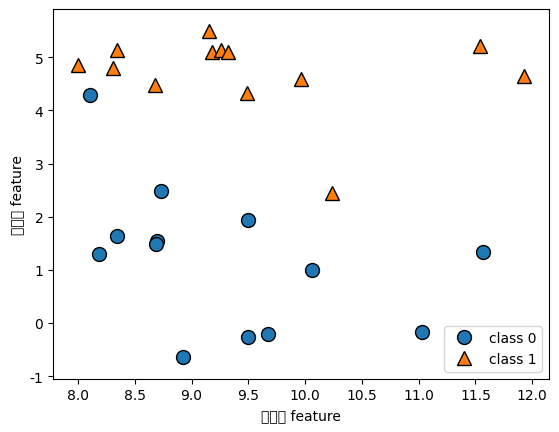

In [ ]:
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 이진분류이기 때문에  class값은 두개
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("첫번째 feature")
plt.ylabel("두번째 feature")
print("X.shape: {}".format(X.shape)) # X.shape:(26, 2)

#피마인디언 데이터를 이용한 당뇨병 이진 분류

#1. 라이브러리 및 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

diabetes = pd.read_csv('diabetes.csv')
print(diabetes['Outcome'].value_counts())
diabetes.head(5)


Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#2. 정보확인

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##피마인디언 당뇨병 데이터셋
- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)


#3. 결측치 및 이상치 확인

In [ ]:
diabetes.isna().sum(axis=0)

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
(diabetes[cols]==0).sum(axis=0)

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


#4. 데이터 시각화

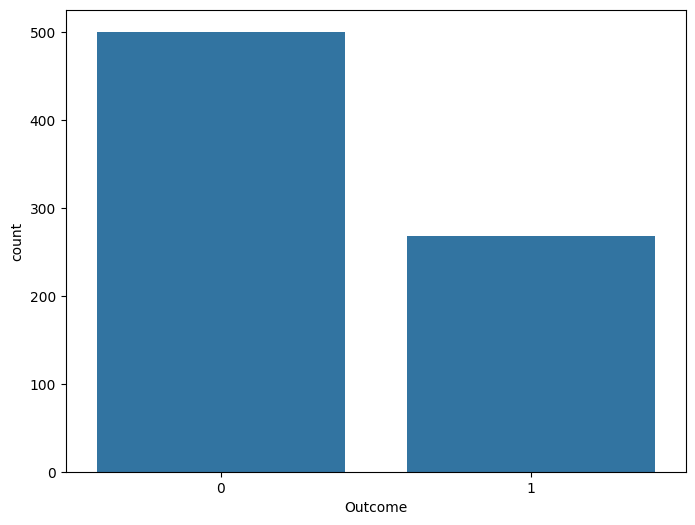

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data=diabetes)
plt.show()

#5. 범주별 데이터 수

In [ ]:
diabetes['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


#6. 특성과 레이블 분리

In [ ]:
X_data = diabetes.drop(['Outcome'],axis = 1)
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y_data=diabetes['Outcome']
y_data.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


#7. 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [ ]:
# 이상치 처리

import numpy as np

def impute_zero(data, col):
  df = data.loc[data[col] != 0, col]
  avg = np.sum(df)/len(df)
  k = len(data.loc[data[col] == 0, col])
  data.loc[data[col]==0, col] = avg
  print('%s : fixed %d, mean : %.3f' %(col, k, avg))

for col in cols:
  impute_zero(X_train, col)

Glucose : fixed 5, mean : 121.847
BloodPressure : fixed 24, mean : 72.239
SkinThickness : fixed 176, mean : 28.596
Insulin : fixed 290, mean : 154.330
BMI : fixed 7, mean : 32.352


In [ ]:
#이상치 확인

(X_train[cols] == 0).sum(axis = 0)

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


In [ ]:
# 테스트 데이터의 이상치 처리

for col in cols:
  impute_zero(X_test, col)

Glucose : fixed 0, mean : 121.052
BloodPressure : fixed 11, mean : 73.091
SkinThickness : fixed 51, mean : 31.524
Insulin : fixed 84, mean : 161.186
BMI : fixed 4, mean : 32.883


In [ ]:
# 테스트 데이터 이상치 처리

for col in cols:
  impute_zero(X_test, col)

Glucose : fixed 0, mean : 121.052
BloodPressure : fixed 0, mean : 73.091
SkinThickness : fixed 0, mean : 31.524
Insulin : fixed 0, mean : 161.186
BMI : fixed 0, mean : 32.883


#8. 테스트 정규화
- 표준 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(X_train_s[:5])

[[-5.26396861e-01 -1.25832567e+00  0.00000000e+00  4.22787785e-16
   0.00000000e+00  1.02533391e-15 -4.90734790e-01 -1.03594038e+00]
 [ 1.58804586e+00 -3.27397242e-01  8.07407436e-01 -5.46930179e-01
   0.00000000e+00 -5.99178052e-01  2.41502991e+00  1.48710085e+00]
 [-8.28460107e-01  5.70283740e-01 -2.17042447e+00 -1.14195109e+00
  -8.20791983e-01 -5.27026593e-01  5.49160552e-01 -9.48938958e-01]
 [-1.13052335e+00  1.30172750e+00 -1.83955426e+00  4.22787785e-16
   0.00000000e+00 -1.50828644e+00 -6.39291267e-01  2.79212217e+00]
 [ 6.81856121e-01  4.04046521e-01  6.41972330e-01  1.00012419e+00
   2.48169622e+00  1.99827450e+00 -6.86829340e-01  1.13909516e+00]]


#9. 넘파이 배열로 타입 변경

In [ ]:
# 이상치 존재여부 확인

y_train = y_train.values
y_test = y_test.values

print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


#10. 모델 만들기
- keras를 이용해 모델 구성


In [ ]:
# keras를 이용해 모델 구성

from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(12, input_dim = 8, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

#11. 모델 컴파일
- 이진 분류 모델의 학습을 위한 loss함수를 binary_crossentropy르 설정

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

#12. 모델 학습

In [ ]:
EPOCHS = 100 #500으로 실행
BATCH_SIZE =16
history = model.fit(X_train_s, y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = .2,
                    verbose = 1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - acc: 0.4587 - loss: 0.7248 - val_acc: 0.5772 - val_loss: 0.6725
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6241 - loss: 0.6766 - val_acc: 0.6585 - val_loss: 0.6477
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6760 - loss: 0.6497 - val_acc: 0.6748 - val_loss: 0.6282
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7426 - loss: 0.6221 - val_acc: 0.6911 - val_loss: 0.6056
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7304 - loss: 0.5912 - val_acc: 0.7073 - val_loss: 0.5825
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6931 - loss: 0.5913 - val_acc: 0.7154 - val_loss: 0.5589
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6973 - loss: 0.5538 - val_acc: 0.7154 - val_loss: 0.5382
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7177 - loss: 0.5248 - val_acc: 0.7073 - val_loss: 0.5205
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.735

#13. 학습곡선

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

  plt.show()

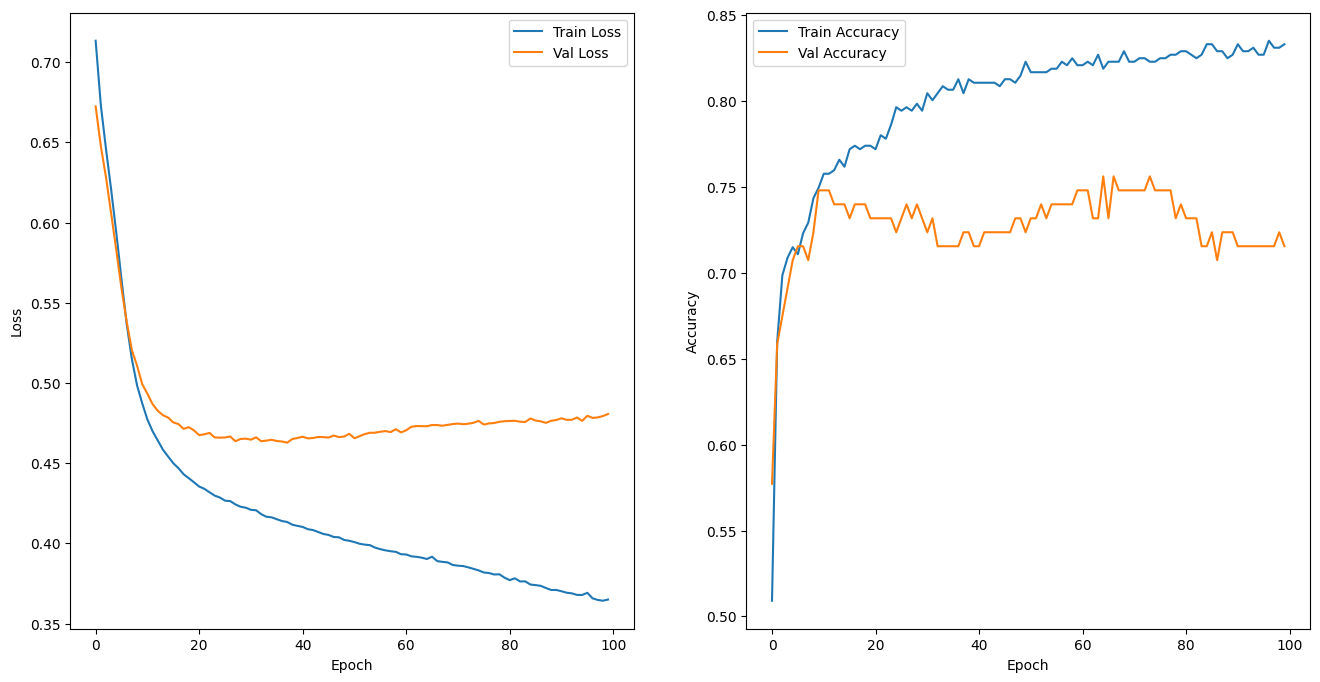

In [ ]:
plot_history(history)

# [실습] 당뇨병 이진분류에 콜백 함수 적용

## 1. 모델 생성과 컴파일

##2. 정보확인

##3. 학습 모델

##4. 예측

##5. 예측결과 확인

##6. 혼동 행력 시각화(confusion matrix)

##7.평가지표 계산(precision, recall, f1_score)

##8. 평가 지표 출력

#► 다중 분류


#1. 데이터 준비

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#2. 이미지 확인

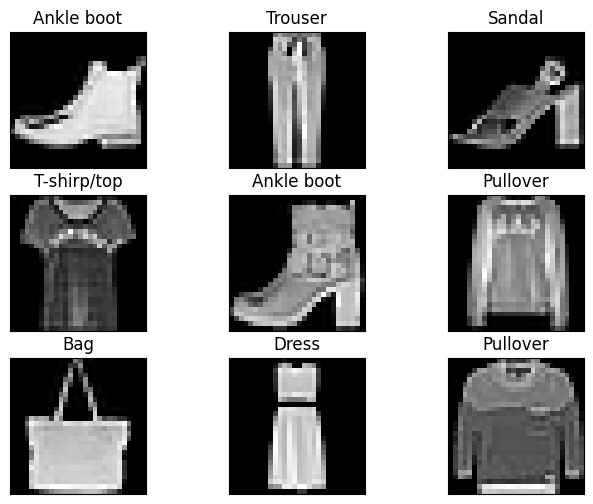

In [ ]:
class_names =['T-shirp/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

samples = np.random.randint(len(X_train), size = 9)

plt.figure(figsize = (8,6))
for i , idx in enumerate(samples):
  plt.subplot(3,3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap ='gray')
  plt.title(class_names[y_train[idx]])
plt.show()

#3. 검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)


(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


#4. 이미지 데이터의 정규화(최대-최소 정규화)

In [ ]:
import numpy as np

X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

print(np.max(X_train), np.min(X_train))

1.0 0.0


#5. Shape 변경
- 이미지 데이터를 Dense 레이어에 입력하기 위해 데이터를 batch num,  input num 형태로 변경

In [ ]:
X_train = (X_train.reshape((-1,28*28)))
X_val = (X_val.reshape((-1,28*28)))
X_test = (X_test.reshape((-1,28*28)))

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(42000, 784) (42000,)
(18000, 784) (18000,)
(10000, 784) (10000,)


#5. 원- 핫 인코딩

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

#6. 모델 만들기

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(784,)))
  model.add(layers.Dense(64, activation ='relu',input_shape = (784,)))
  model.add(layers.Dense(32, input_shape = (784,)))
  model.add(layers.Dense(10, activation ='softmax'))
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

#7. 컴파일
- 손실함수, 옵티마이저, 메트릭스 설정

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

#8. 학습

In [ ]:
EPOCHS = 100
BATCH_SIZE =64

history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = .2)

Epoch 1/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7005 - loss: 0.8476 - val_acc: 0.8427 - val_loss: 0.4682
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8411 - loss: 0.4494 - val_acc: 0.8595 - val_loss: 0.4074
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8593 - loss: 0.3992 - val_acc: 0.8620 - val_loss: 0.3898
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8694 - loss: 0.3573 - val_acc: 0.8715 - val_loss: 0.3639
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8773 - loss: 0.3407 - val_acc: 0.8593 - val_loss: 0.3847
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8803 - loss: 0.3334 - val_acc: 0.8694 - val_loss: 0.3549
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8860 - loss: 0.3101 - val_acc: 0.8694 - val_loss: 0.3716
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8840 - loss: 0.3139 - val_acc: 0.8799 - val_loss: 0.3375
Epoch 9/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

#9. 학습곡선

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

plt.show()

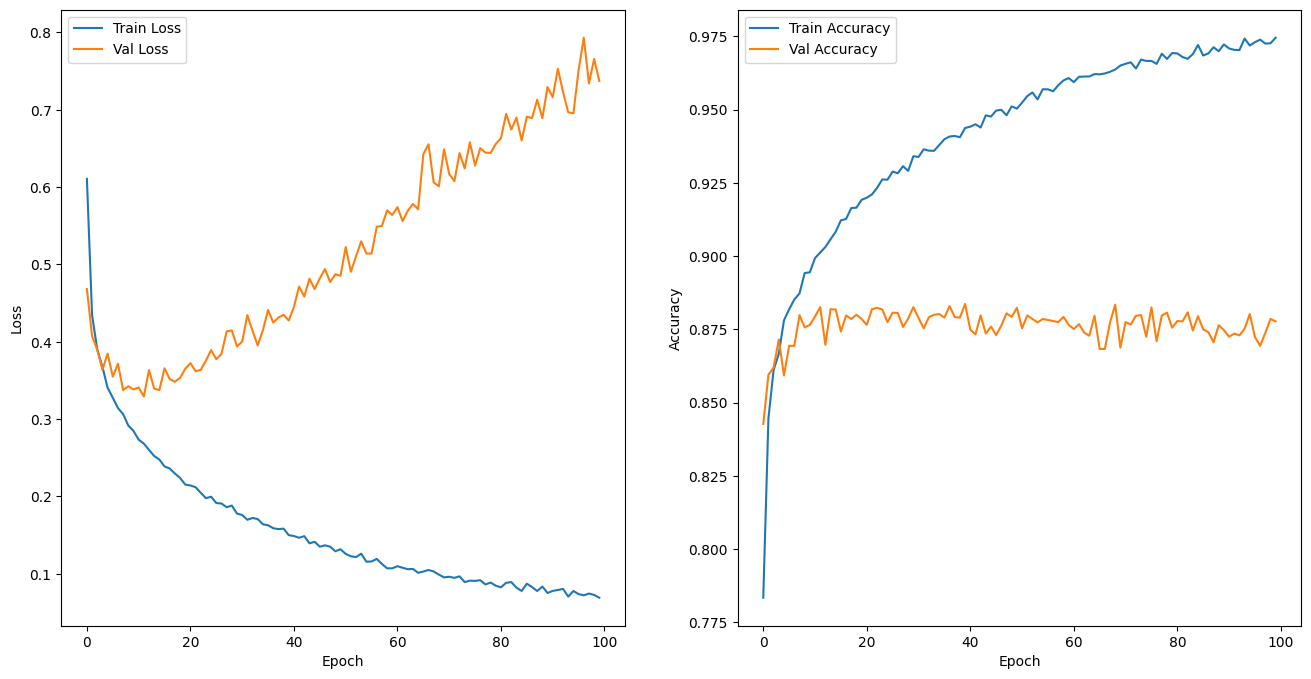

In [ ]:
plot_history(history)

#10. 예측

In [ ]:
y_pred = model.predict(X_test)
y_pred[:1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.1349712e-15, 2.5647451e-17, 1.6723311e-20, 1.5006077e-19,
        1.2231962e-19, 4.6670978e-10, 1.7325143e-19, 4.2044563e-09,
        2.1506079e-23, 9.9999994e-01]], dtype=float32)

#11. 가장 높은 확률 인덱스 추출
- np.argmax()

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis = 1)
y_pred_argmax[:10]


array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])

#12. 예측 결과의 이미지 표시

<Figure size 1600x600 with 0 Axes>

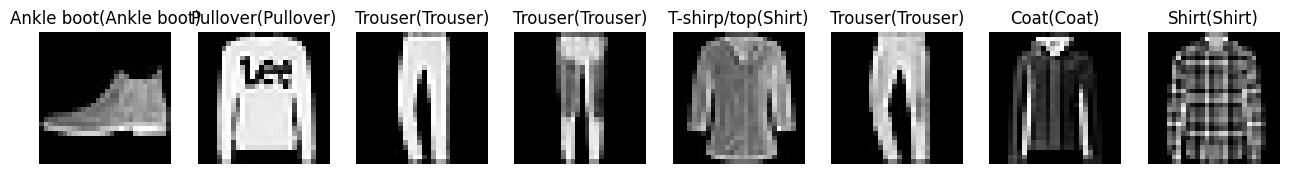

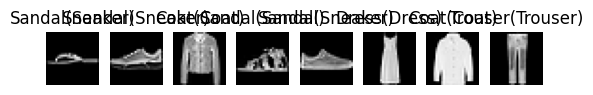

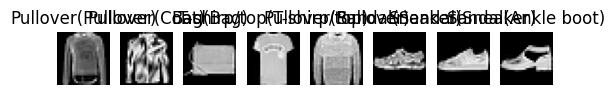

In [ ]:
n_rows = 3
n_cols = 8

plt.figure(figsize = (n_cols *2, n_rows *2))
plt.figure(figsize = (n_cols *2, n_rows *2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_test[index].reshape(28,28), cmap = 'gray')
    #plt.imshow(X_test[index], cmap = 'gray')
    plt.axis('off')
    plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_test[index]]})')

  plt.show()

#[실습] 붓꽃데이터 / 펭귄데이터를 이용한 분류 실습

# ►회사 주식 예측하기

In [ ]:
df = pd.read_csv('./fly-AI/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# 라이블러ㅣ 호출

#데이터 가공
import numpy as np
import pandas as pd

# 카테고리컬 인코딩
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 피쳐 스케일링
from sklearn.preprocessing import MinMaxScaler

# 데이터셋 분리
from sklearn.model_selection import train_test_split

# 인공지능 모델링
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# 학습할 데이토와 예측 데이터 설정

# 학습 데이터 X
# X = Profit 컬럼 빼고 전부
X = df.iloc[ : ,0:-1]

# 예측 데이터 y
# y = Profit, 수익
y = df['Profit']

In [ ]:
# 데이터 확인

df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
# 정수로 변환

# 카테고리컬 인코딩
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(), [3] ) ], remainder='passthrough')
X = ct.fit_transform(X)

# 3개의 고유값에서 최적화를 위하여 한 개의 데이터 제거
X = X[ : , 1 : ]

In [ ]:
# 피쳐 스케일링 (y데이터 형식을 2차원 배열로 변경)

# y 데이터는 Profit의 컬럼만 가지므로 시리즈 데이터를 2차원 배열로 변경 해야 함
y.shape

(50,)

In [ ]:
y = y.values.reshape(50, 1)
y.shape

(50, 1)

##서로 다른 범위의 정수의 데이터들을 일정 범위에 맞게 피쳐 스케일링 진행 (정규화)

- m_sc_X : 학습 데이터 X를 정규화하는 스케일러
- m_sc_y : 예측 데이터 y를 정규화하는 스케일러
- X_scaled : 정규화 된 X의 값을 가지는 변수
- y_scaled : 정규화 된 y의 값을 가지는 변수

In [ ]:
# 피쳐 스케일링
from sklearn.preprocessing import MinMaxScaler
m_sc_X = MinMaxScaler()
m_sc_y  = MinMaxScaler()
X_scaled = m_sc_X.fit_transform(X)
y_scaled = m_sc_y.fit_transform(y)

In [ ]:
# 데이터셋 분리, 기본 값 테스트 사이즈 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state = 3)

In [ ]:
# 인공지능 모델 생성

model=Sequential()
model.add( Dense(units=5, activation='relu', input_shape=( 5 , )) )
model.add( Dense(units=15, activation='relu') )
model.add( Dense(units=10, activation='relu') )
model.add( Dense(units=1, activation='linear') )

###레이어 설정

- 유닛과 활성함수는 원하는대로 설정
- 첫번째 input layer는 반드시 입력층의 형태를 지정
- 마지막 output layer는 분류 문제의 모델이 아니기 때문에 sigmiod 사용하지 않음

In [ ]:
# 컴파일 설정 (adam)

model.compile(loss='mse', optimizer='adam')

## 학습 및 측정
- epoch_history : 임의의 변수, 학습 내용을 저장 (오차(손실) 확인용도)
- epochs : 모델의 전체 데이터 셋에서 학습 횟수
- batch_size : 샘플의 갯수대로 학습 한 후 가중치 갱신

In [ ]:
# 학습 결과 변수에 저장
# 200번 학습, 10번 단위로 가중치 갱신
epoch_history = model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 0.6264
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 0.5628
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5067
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4550
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4057
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3652
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3283
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2986
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2661
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2394
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2128
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1871
Epoch 13/200
4/4 [==============================] - 0s 5ms/st

In [ ]:
# 예측(학습 모델을 이용한 결과값 예측, perdict)
# 결과값 예측
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 148ms/step


In [ ]:
# 결과값 확인
y_pred

array([[0.62106407],
       [0.45270175],
       [0.82151484],
       [0.1761257 ],
       [0.44295564],
       [0.38219416],
       [0.65362954],
       [0.1873869 ],
       [0.3582191 ],
       [0.66951025],
       [0.36696497],
       [0.5979545 ],
       [0.5224757 ]], dtype=float32)

In [ ]:
# 실제값 확인
y_test

array([[0.71462897],
       [0.37348913],
       [0.7606613 ],
       [0.15698988],
       [0.46627976],
       [0.49893437],
       [0.67364377],
       [0.11821128],
       [0.28294041],
       [0.79649041],
       [0.42812595],
       [0.52963376],
       [0.42385155]])

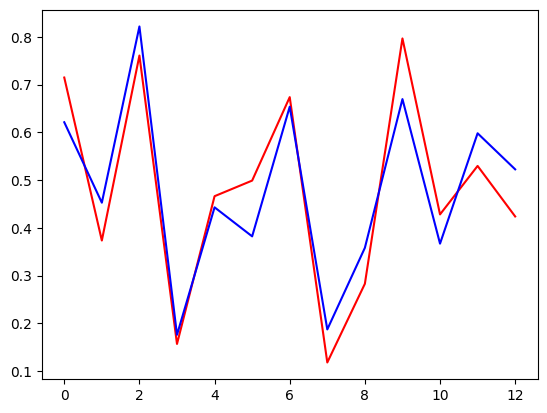

In [ ]:
# 실제값과 예측값 비교

import matplotlib.pyplot as plt
plt.plot(y_test, c='r') # 실제값은 빨간선
plt.plot(y_pred, c='b') # 예측값은 파란선
plt.show()

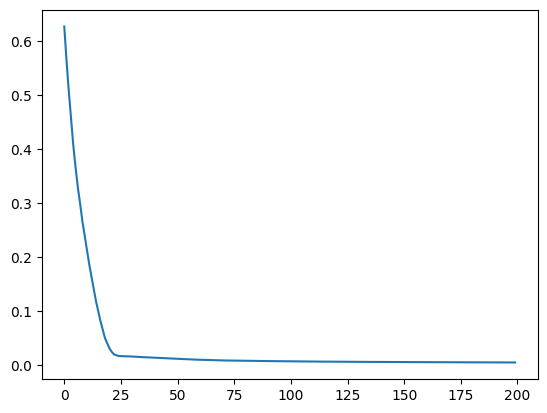

In [ ]:
## 인공신경망 모델의 오차(손실) 확인
### 최종 값이 낮을수록 모델의 성능이 향상, 즉 정확도가 높아짐

plt.plot(epoch_history.history['loss'])
plt.show()

# 금융상품 갱신 여부 예측하는 인공신경망 구성하기

In [ ]:
# 라이브러리 호출

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# 데이터 확인

df = pd.read_csv('./fly-AI/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# 학습 할 데이터와 예측 데이터 설정
### 학습 데이터 X
### 학습에 필요한 데이터만 추출

In [ ]:
# 학습할 데이터 설정 [CreditScore:EstimatedSalary]
X = df.iloc[ : , 3:-2+1 ]
X.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [ ]:
# 예측 할 데이터 설정
y = df['Exited']
y.head() # 0과 1로 구분, 1:갱신/0:미갱신

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## 문자열 데이터 숫자로 치환
###컬럼에서 Geography와 Gender가 문자열로 되어 있으므로 컴퓨터가 학습 할 수 있게 정수로 변경
- 절차 : 각 컬럼의 고유 값 갯수 확인 > 카테고리컬 인코딩 진행
- 카테고리컬 인코딩 : 고유값이 2개일 경우 Label Encoding, 2개 초과일 경우 OneHot Encoding

In [ ]:
# 문자열 데이터 고유값 확인
print('Geography : ', X['Geography'].unique())
print('Gender : ', X['Gender'].unique())

Geography :  ['France' 'Spain' 'Germany']
Gender :  ['Female' 'Male']


In [ ]:
# 카테고리컬 인코딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 성별은 고유값이 2개이므로 레이블 인코딩 진행
l_encoder_gender = LabelEncoder()
X['Gender'] = l_encoder_gender.fit_transform( X['Gender'] )

# 국가는 고유값이 3개이므로 원핫 인코딩 진행
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(), [1] ) ], remainder='passthrough')
X = ct.fit_transform(X)

# 최적화를 위해 컬럼 하나 삭제
# 이유? 3개의 컬럼 중 원핫 인코딩의 0 0 이 되는 부분이 다른 컬럼이기 때문
# germany  spain
# 0         0
# 0         1
# 1         0
# France 컬럼 제외
X = X[ : , 1: ]

# 피쳐 스케일링
## 서로 다른 범위의 정수의 데이터들을 일정 범위에 맞게 피쳐 스케일링 진행

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)

# 6. 인공지능 학습을 위한 학습 데이터와 검증용 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# 7. 인공신경망 모델링
- 모델링 변수 지정 (변수 : model)

In [ ]:
model =Sequential()

In [ ]:
# 첫번째 레이어 input layer 추가
# 유닛 6개, 전달 값 11개
model.add( Dense(units=6, activation='relu', input_shape=(11,)) )

# 두번째 레이어 hidden layer 추가
# 첫번째 레이어에서 입력층의 크기를 정했으므로 생략 가능
# 유닛 8개, input layer에서 전달 받는 값 11개
model.add( Dense(units=8, activation=tf.nn.relu ) )

# 세번째 레이어 output layer 추가
model.add( Dense(units=1, activation='sigmoid') )

## 컴파일
### loss='binary_crossentropy'
- 출력 값이 두개인 이진 분류에서 사용
- 모델의 마지막 레이어의 활성화 함수는 시그모이드 함수 사용
### metrics=['accuracy']
- 모델의 정확도 출력
- 분류 문제의 인공지능 모델에서 사용

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()
# 파라미터 = 가중치(weight)
# 11 * 6 = 66 ->  72?
# -> 상수 하나가 포함되기 때문에 12 * 6 -> 72

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 72        
                                                                 
 dense_15 (Dense)            (None, 8)                 56        
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


## 학습 및 측정
- epochs : 전체 데이터셋을 몇 번 반복 학습할지 설정
-- 만약 100이면, 서로 다른 값 100개의 가중치로 반복 학습을 진행하여 모델의 성능을 향상시킴
- batch_size : N개의 샘플로 테스트하여 가중치를 갱신할지를 설정
-- 배치 사이즈가 클수록 많은 데이터를 저장해두어야 하므로 용량이 커짐
-- 배치 사이즈가 작을수록 학습률은 높지만 가중치 갱신률이 높아져서 시간이 오래 걸림
-- 예 ) epochs=100, batch_size=100 : 모두 예측한 뒤 실제 값과 비교 후 가중치 갱신
-- 예 ) epochs=100, batch_size=50 : 반절을 예측한 뒤 실제 값과 비교 후 가중치 갱신, 나머지 다시 예측

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
800/800 [==============================] - 4s 2ms/step - loss: 0.5263 - accuracy: 0.7666
Epoch 2/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4652 - accuracy: 0.7985
Epoch 3/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4498 - accuracy: 0.8016
Epoch 4/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8091
Epoch 5/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4329 - accuracy: 0.8119
Epoch 6/20
800/800 [==============================] - 2s 2ms/step - loss: 0.4289 - accuracy: 0.8166
Epoch 7/20
800/800 [==============================] - 2s 2ms/step - loss: 0.4260 - accuracy: 0.8186
Epoch 8/20
800/800 [==============================] - 3s 3ms/step - loss: 0.4242 - accuracy: 0.8209
Epoch 9/20
800/800 [==============================] - 2s 3ms/step - loss: 0.4208 - accuracy: 0.8254
Epoch 10/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8260

## 모델 평가
- 텐서플로우는 자체적으로 검증해주는 함수 존재 (evaluate)
--정확도를 나타내는 함수는 분류 문제의 인공지능 모델에서 사용

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 2ms/step - loss: 0.4040 - accuracy: 0.8395


[0.4040450155735016, 0.8395000100135803]

In [ ]:
# 예측

y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# 실제값과 예측값 확인

# 실제값은 0과 1로 구성
y_test

# 예측 값은 0과 1사이의 실수로 구성
y_pred

array([[0.27425614],
       [0.35522446],
       [0.15112267],
       ...,
       [0.1349959 ],
       [0.17464113],
       [0.1753218 ]], dtype=float32)

In [ ]:
# y_pred는 0과 1로 구분하기 위해 데이터 가공
# 0.5 초과 > True
# 0.5 이하 > False
y_pred = (y_pred>0.5).astype(int)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## 결과 지표 (컨퓨전 매트릭스)
- 결과 지표는 인공지능 모델이 맞춘 것과 못 맞춘 것을 나타내므로 분류 문제에서 사용

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[1536,   59],
       [ 262,  143]])

In [ ]:
# 수동으로 정확도 계산하기
cm = confusion_matrix(y_test, y_pred)
(1546+152) / cm.sum()

0.849

In [ ]:
#라이브러리

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Input

In [ ]:
#1. 데이터 설정

weights = np.array([87,81,82,92,90,61,86,66,69,69,76,53,70])
heights = np.array([187,174,179,192,188,160,179,168,168,174,182,162,176])

In [ ]:
#2. 데이터 스케일링
scaler = StandardScaler()
weights_scaled = scaler.fit_transform(weights.reshape(-1,1))
heights_scaled = scaler.fit_transform(heights.reshape(-1,1))

In [ ]:
#3. 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(weights_scaled,
                                                    heights_scaled,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
#4.모델1- 단일 레이어 아키텍쳐

model = Sequential()
dense_layer = Dense(units=1, input_shape=[1])
model.add(dense_layer)
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 위에서 param# 2(가중치하나와 바이어스 하나로 총 두개)

In [ ]:
#5. 모델 학습 (model.fit)

model.fit(X_train, y_train, epochs=100, verbose=0)

## 위에서 verbose=0은 fit 메서드에서 사용되고 모델 학습 중 출력되는 로그의 상세 정도를 설정하는 옵션

verbose=0:
- 아무런 로그를 출력하지 않는다
- 학습 상태를 확인하지 않아도 될 때 유용

verbose=1 (기본값):
- 학습 진행 상황을 한 줄씩 출력
- epoch별로 손실 값을 표시하며, 진행 바(progress bar)가 표시

In [ ]:
#6. 단일모델을 학습하고 모델2-Hidden layer를 추가

model2 = Sequential([
    Input(shape=(1,)),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

model2.compile(optimizer= 'adam',loss= 'mean_squared_error')
model2.summary()
model2.fit(X_train, y_train, epochs=150, verbose=0)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#7. 예측 및 평가

predictions = model.predict(X_test)
predictions2 = model2.predict(X_test)

mse_model1 = mean_squared_error(y_test, predictions)
mse_model2 = mean_squared_error(y_test, predictions2)

print(f"Model 1 MSE: {mse_model1}")
print(f"Model 2 MSE: {mse_model2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Model 1 MSE: 7.391840635702842
Model 2 MSE: 0.41760165404727273


In [ ]:
# 값 예측 테스트

def predict_height(weight):
    # 입력 데이터를 2D 배열로 변환
    weight_array = np.array([[weight]])
    # 스케일링 적용
    weight_scaled = scaler.transform(weight_array)
    # 예측
    height_scaled = model2.predict(weight_scaled)
    # 스케일 복원
    height_original = scaler.inverse_transform(height_scaled)
    # 결과 출력
    return f"predict({weight}) = {height_original[0, 0]:.2f}"
# 결과
result = predict_height(90)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
predict(90) = 69.06


### 위의 예측을 해보면 몸무게가 90일경우 키가 69.75? 이상한 값이 !!!!!

#지금처럼 이상한 값이 나왔을 경우 예상해 볼 수 있는 문제로는

1. StandardScaler의 스케일링 문제
2. 모델의 학습 및 예측 문제
3. 모델 성능 문제
4. 스케일링 후 복원 문제

## 키와 몸무게는 같은 단위를 사용하지 않기 때문에 각자 다른 스케일러를 사용

In [ ]:
# 위 코드에서 데이터 스케일링 수정

weight_scaler = StandardScaler()
height_scaler = StandardScaler()
weights_scaled = weight_scaler.fit_transform(weights.reshape(-1,1))
heights_scaled = height_scaler.fit_transform(heights.reshape(-1,1))

In [ ]:
#값 예측 테스트
def predict_height(weight):
    # 입력 데이터를 2D 배열로 변환
    weight_array = np.array([[weight]])
    # 스케일링 적용
    weight_scaled = weight_scaler.transform(weight_array)
    # 예측
    height_scaled = model2.predict(weight_scaled)
    # 스케일 복원
    height_original = height_scaler.inverse_transform(height_scaled)
    # 결과 출력
    return f"predict({weight}) = {height_original[0, 0]:.2f}"
# 예측
result = predict_height(90)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
predict(90) = 186.88


# 간단한 신경망 모델 만들기

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
x = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
y = [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]

X_train = np.array(x).reshape(-1, 1)
y_train = np.array(y)

print(X_train.shape, y_train.shape)

(10, 1) (10,)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
